<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Show summary

In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0.5, 0, 'Median value in thousands $')

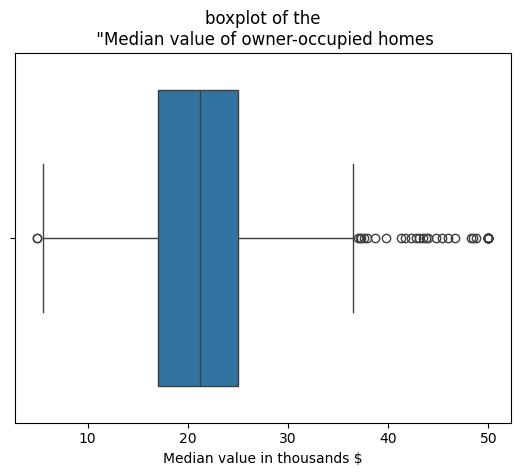

In [18]:
# boxplot for the "Median value of owner-occupied homes"
ax = sns.boxplot(data=boston_df, x = boston_df['MEDV']).set(title='boxplot of the\n "Median value of owner-occupied homes')
pyplot.xlabel('Median value in thousands $')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)


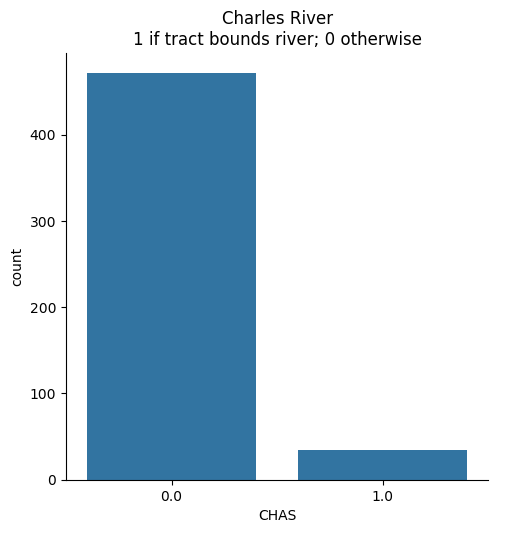

In [50]:
#bar plot for the Charles river 
ax = sns.catplot(kind='count', data=boston_df, x='CHAS').set(title='Charles River\n1 if tract bounds river; 0 otherwise')


#TASK 3
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
# H0 u1 = u2
# H1 u1 <>u2

leven = scipy.stats.levene(boston_df[boston_df['CHAS'] == 1] ['MEDV'],
                   boston_df[boston_df['CHAS'] == 0] ['MEDV'], center = 'mean')
# Since p value < 0.05 we can assume no equality of variance

# T test
ttest = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1] ['MEDV'],
                   boston_df[boston_df['CHAS'] == 0] ['MEDV'], equal_var = False)
#Since p value < 0.05 we reject H0, so there is a statistical difference in median value

print(leven)
print(ttest)


F_Statistic: 36.40764999196599, P-Values: 1.7105011022702984e-15


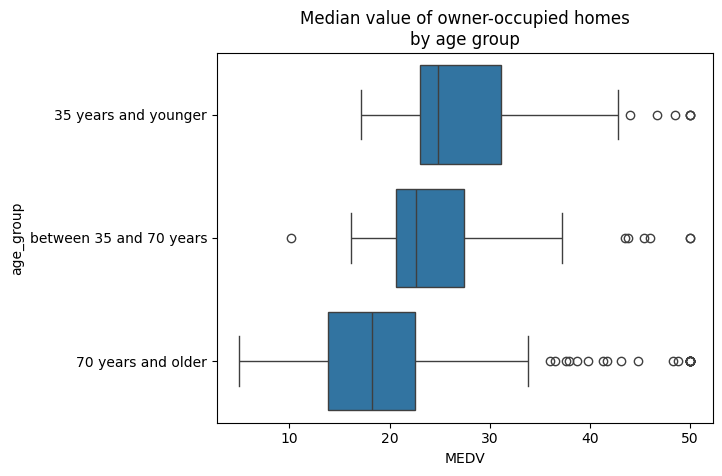

In [49]:
# boxplot for the MEDV variable vs the AGE variable

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(data=boston_df, x=boston_df['MEDV'], y = boston_df['age_group'], order = ['35 years and younger','between 35 and 70 years','70 years and older']).set(title='Median value of owner-occupied homes\nby age group')


# TASK 3
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# H0: u1=u2=u3...=ui
# H1: at least one of the mean is differ
thirty_five_medv = boston_df[boston_df['age_group'] == '35 years and younger'] ['MEDV']
thirty_five_to_seventy_medv = boston_df[boston_df['age_group'] == 'between 35 and 70 years'] ['MEDV']
seventy_medv = boston_df[boston_df['age_group'] == '70 years and older'] ['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirty_five_medv,thirty_five_to_seventy_medv,seventy_medv)
print("F_Statistic: {0}, P-Values: {1}".format(f_statistic,p_value))

# Since p< 0.05 we reject H0, so at least one of the mean is differ 

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

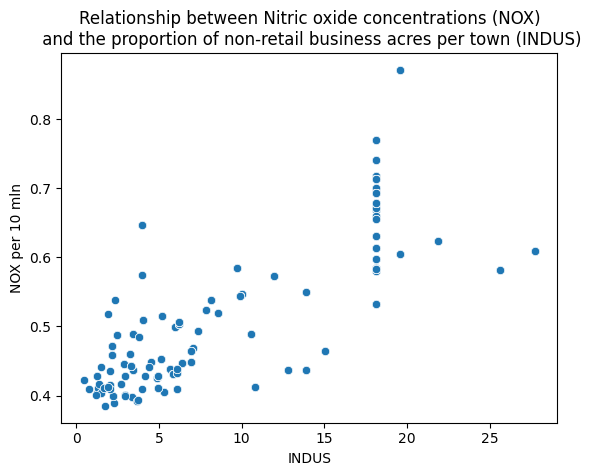

In [39]:
# relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

ax = sns.scatterplot(data=boston_df, x='INDUS', y='NOX').set(title='Relationship between Nitric oxide concentrations (NOX)\n and the proportion of non-retail business acres per town (INDUS)')
pyplot.ylabel('NOX per 10 mln')

# Pearson Correlation
# H0 p = 0
# H1 p != 0
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# p value < 0.05 so we reject H0 There is a significant correlation between INDUS and NOX

Text(0.5, 0, 'pupil to teacher ratio')

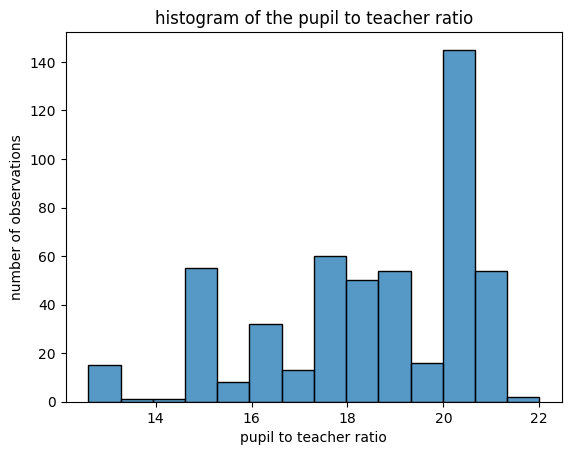

In [36]:
#  histogram for the pupil to teacher ratio variable
ax = sns.histplot(data=boston_df, x='PTRATIO').set(title = 'histogram of the pupil to teacher ratio')
pyplot.ylabel('number of observations')
pyplot.xlabel('pupil to teacher ratio')

In [64]:
# Regression analysis
#  What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# H0 b1=0 (additional weighted distance  to the five Boston employment centres has no effect on the median value of owner occupied homes
# H1 b1!= 0 (additional weighted distance  to the five Boston employment centres has impact on the median value of owner occupied homes

x =boston_df['DIS']
y= boston_df['MEDV']
## add an intercept (beta_0) to our model
x = sm.add_constant(x) 

model = sm.OLS(y,x).fit()
prediction = model.predict(x)
model.summary()

# P value < 0.05 so we reject Ho, thats mean additional weighted distance  to the five Boston employment centres has impact on the median value of owner occupied home
# The coefficient 1.0916 means that dditional weighted distance  to the five Boston employment centres get 1.0916 more 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        20:55:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""